In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits() # 手写数字识别的数据集

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
y = digits.target

In [7]:
y.shape

(1797,)

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
y[:100] # 一维数组，取前100个元素

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1])

In [10]:
X[:10] # 二维数组，取前10行

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

In [11]:
some_digits = X[666] # 取底666行,其实是一幅图像的像素点
some_digits

array([  0.,   0.,   5.,  15.,  14.,   3.,   0.,   0.,   0.,   0.,  13.,
        15.,   9.,  15.,   2.,   0.,   0.,   4.,  16.,  12.,   0.,  10.,
         6.,   0.,   0.,   8.,  16.,   9.,   0.,   8.,  10.,   0.,   0.,
         7.,  15.,   5.,   0.,  12.,  11.,   0.,   0.,   7.,  13.,   0.,
         5.,  16.,   6.,   0.,   0.,   0.,  16.,  12.,  15.,  13.,   1.,
         0.,   0.,   0.,   6.,  16.,  12.,   2.,   0.,   0.])

In [12]:
y[666] # 666处对应的图像识别结果为0

0

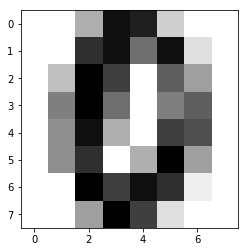

In [13]:
some_digits_image = some_digits.reshape(8, 8) # 转换成8*8的图像
plt.imshow(some_digits_image, cmap=matplotlib.cm.binary)
plt.show() # 可以通过图像看出来是数字0.即y[666]的结果

In [14]:
from playML.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)


In [16]:
from playML.kNN import kNNClassifier

In [17]:
my_knn_clf = kNNClassifier(k = 3)

In [18]:
my_knn_clf.fit(X_train, y_train)

kNN(k = 3)

In [19]:
y_predict = my_knn_clf.predict(X_test)

In [20]:
print(X_train.shape)
print(y_train.shape)

(1438, 64)
(1438,)


In [21]:
print(X_test.shape)
print(y_test.shape)

(359, 64)
(359,)


In [22]:
y_predict

array([2, 3, 1, 4, 3, 5, 4, 2, 4, 2, 6, 6, 6, 4, 1, 9, 3, 0, 0, 7, 0, 5, 8,
       8, 9, 9, 4, 4, 8, 7, 4, 7, 7, 6, 9, 6, 4, 3, 1, 1, 0, 6, 4, 1, 1, 8,
       1, 1, 4, 2, 2, 2, 5, 6, 6, 5, 8, 0, 1, 6, 5, 1, 3, 5, 4, 8, 7, 7, 4,
       4, 3, 6, 1, 4, 0, 0, 7, 5, 1, 9, 0, 5, 7, 3, 9, 2, 2, 6, 9, 6, 1, 9,
       9, 8, 5, 9, 4, 0, 8, 1, 8, 4, 9, 4, 5, 4, 3, 1, 2, 3, 0, 5, 9, 8, 8,
       5, 1, 7, 2, 3, 2, 5, 4, 2, 9, 8, 1, 2, 4, 9, 1, 1, 2, 8, 6, 7, 9, 0,
       7, 9, 6, 1, 2, 9, 0, 3, 3, 5, 6, 5, 7, 4, 1, 8, 6, 1, 6, 7, 3, 6, 3,
       1, 0, 1, 9, 0, 1, 4, 9, 6, 5, 3, 0, 1, 4, 9, 9, 9, 1, 2, 8, 9, 0, 4,
       9, 7, 0, 0, 9, 3, 8, 9, 2, 5, 1, 2, 4, 1, 3, 2, 5, 8, 0, 5, 6, 4, 8,
       5, 6, 3, 9, 8, 0, 7, 3, 7, 6, 2, 0, 5, 1, 6, 8, 0, 5, 4, 6, 8, 7, 0,
       7, 1, 1, 4, 1, 1, 8, 0, 9, 4, 3, 4, 3, 8, 8, 7, 7, 2, 7, 5, 5, 7, 6,
       8, 9, 1, 6, 9, 0, 5, 1, 4, 3, 5, 8, 6, 2, 9, 5, 9, 1, 6, 1, 7, 7, 4,
       5, 9, 4, 3, 3, 7, 8, 2, 9, 9, 9, 8, 8, 9, 7, 5, 0, 3, 4, 0, 5, 9, 5,
       3, 3,

In [23]:
sum(y_predict == y_test) # 正确数

352

In [24]:
sum(y_predict == y_test) / len(y_test) # 正确率

0.98050139275766013

In [25]:
from playML.metrics import accuracy_score
accuracy_score(y_test, y_predict) # 自己的封装器

0.98050139275766013

In [27]:
my_knn_clf.score(X_test, y_test)

0.98050139275766013

# 下面用sklearn中的原生方法从头做一遍

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666) # 实验可重复

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=3) # 选取3个最近的点

In [32]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
y_predict = knn_classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) # 准确率计算

0.98888888888888893